(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


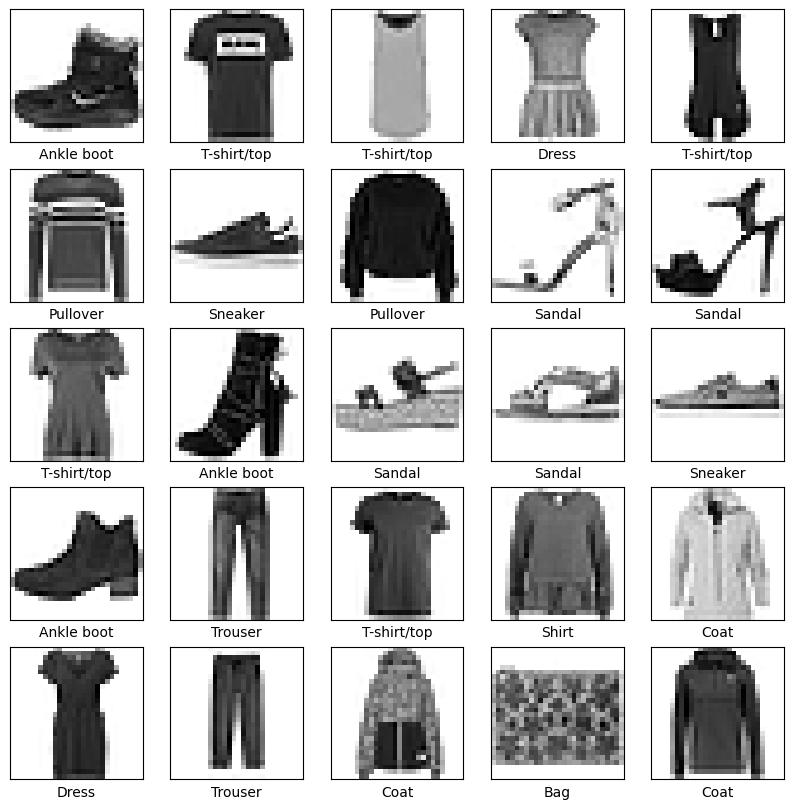

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
   1/1875 ━━━━━━━━━━━━━━━━━━━━ 10:23 333ms/step - accuracy: 0.1250 - loss: 2.4156
Epoch 1: saving model to ckpt_fashion/cp-0001.weights.h5

Epoch 1: saving model to ckpt_fashion/cp-0001.weights.h5

Epoch 1: saving model to ckpt_fashion/cp-0001.weights.h5
  15/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3316 - loss: 1.9294     
Epoch 1: saving model to ckpt_fashion/cp-0001.weights.h5

Epoch 1: saving model to ckpt_fashion/cp-0001.weights.h5

Epoch 1: saving model to ckpt_fashion/cp-0001.weights.h5
  30/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4142 - loss: 1.7027
Epoch 1: saving model to ckpt_fashion/cp-0001.weights.h5

Epoch 1: saving model to ckpt_fashion/cp-0001.weights.h5

Epoch 1: saving model to ckpt_fashion/cp-0001.weights.h5
  45/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4648 - loss: 1.5587
Epoch 1: saving model to ckpt_fashion/cp-0001.weights.h5

Epoch 1: saving model to ckpt_fashion/cp-0001.weights.h5

Epoch 1: saving model to ckpt_fashio

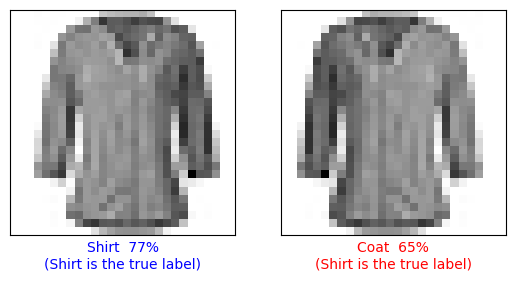

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

def show_image_grids(train_images, train_labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(train_images[i], cmap=plt.cm.binary)
      plt.xlabel(class_names[train_labels[i]])
  plt.show()

if __name__ == '__main__':
  fashion_mnist = keras.datasets.fashion_mnist # dataset is downloaded at C:\Users\User\.keras\datasets\fashion-mnist
  (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
  print(train_images.shape)
  print(train_labels.shape)
  print(test_images.shape)
  print(test_labels.shape)
    
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  show_image_grids(train_images, train_labels) 
    
  # Steps 3~8 (10 points)
  train_images = train_images / 255.0
  test_images = test_images / 255.0
  # output is 10 classes
  model = keras.Sequential([
     keras.layers.Flatten(32, 3, input_shape=(28, 28)),
     keras.layers.Dense(32, 3, activation=tf.nn.relu),
     keras.layers.Dense(10, activation=tf.nn.softmax)
  ])

  model.summary()

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

  tb_callback = TensorBoard(log_dir='log_fashion')

  checkpoint_path = "ckpt_fashion/cp-{epoch:04d}.weights.h5"
  cp_callback = ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1, save_freq=5)
  # Steps 9, 10 (5 points)
  model.fit(train_images, train_labels, epochs=20, callbacks = [cp_callback, tb_callback])
  test_loss, test_acc = model.evaluate(test_images, test_labels)
  print(f"test ACC = {test_acc*100:.2f}%, test loss = {test_loss:.4f}")
  
  # Step 12 (5 points)
  for i in os.listdir("ckpt_fashion"):
    pth = os.path.join("ckpt_fashion", i)
    model.load_weights(pth)
    loss, acc = model.evaluate(test_images, test_labels)
    print(f"Epoch [{i.split('.')[0][-2:]}/20]: test ACC = {acc*100:.2f}%, test loss = {loss:.4f}")
    
  # Step 13 (10 points)
  model.load_weights("ckpt_fashion/cp-0020.weights.h5")
  loss, acc = model.evaluate(test_images, test_labels)
  prob = model.predict(test_images)
  pre_label = np.argmax(prob, axis = 1)
  test_acc = np.sum(pre_label == test_labels) / len(test_images)
  print(f"My calculated ACC is {test_acc:.4f}.")
  print(f"Evaluated ACC is {acc:.4f}.")
  # Step 14 (10 points)
  prob = model.predict(test_images[4:5])
  plt.subplot(1, 2, 1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_images[4], cmap=plt.cm.binary)
  plt.xlabel(f"{class_names[np.argmax(prob[0])]} {np.max(prob[0]) * 100:3.0f}%\n({class_names[test_labels[4]]} is the true label)", fontdict={'color': 'blue'})

  prob = model.predict(np.fliplr(test_images[4:5]))
  plt.subplot(1, 2, 2)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(np.fliplr(test_images[4]), cmap=plt.cm.binary)
  plt.xlabel(f"{class_names[np.argmax(prob[0])]} {np.max(prob[0]) * 100:3.0f}%\n({class_names[test_labels[4]]} is the true label)", fontdict={'color': 'red'})
  plt.show()

In [59]:
# Question 1. What is the difference between the following two options in model.compile()? (5 points)
#	loss='categorical_crossentropy'
#	loss='sparse_categorical_crossentropy'
# Use an example to illustrate the difference.
# Write down your answer here.

# categorical_crossentropy適用在one-hot-encoding的labels上，而sparse_categorical_crossentropy適用在數字類別的labels上，像是[2,1,4]。
# 接下來的測試類別皆為[1, 2]，prob皆相同
print("categorical_crossentropy")
y_true = [[0, 1, 0], [0, 0, 1]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
cce = keras.losses.CategoricalCrossentropy()
print(cce(y_true, y_pred))

print("sparse_categorical_crossentropy")
y_true = np.array([1, 2])
y_pred = np.array([[0.05, 0.95, 0], [0.1, 0.8, 0.1]])
loss = keras.losses.sparse_categorical_crossentropy(y_true, y_pred)
print(loss)
print("Average = ", ((loss[0] + loss[1]) / 2).numpy())

# 差別在於輸入的label是one-hot-encoding還是數字類型，決定使用哪一種計算Loss的做法
# 取平均後，兩者數值相同

categorical_crossentropy
tf.Tensor(1.1769392, shape=(), dtype=float32)
sparse_categorical_crossentropy
tf.Tensor([0.05129339 2.30258509], shape=(2,), dtype=float64)
Average =  1.1769392436907955
